In [94]:
# data processing
import pandas as pd
import numpy as np
from scipy.signal import medfilt
from sklearn.preprocessing import MinMaxScaler

import pywt
#visualization
import matplotlib.pyplot as plt



#model estimation
from sklearn.metrics import accuracy_score


#custom functions
from heuristics.func import *

# Configs

In [95]:
DATA_PATH = './data/raw/'

TRAIN_NAME = f'{DATA_PATH}train.csv'
TEST_NAME = f'{DATA_PATH}test.csv'

# Load the data

In [96]:
train = pd.read_csv(TRAIN_NAME)
train.head()

,row_id,well_id,GR,label
0,0,0,99.005617,0
1,1,0,105.563944,0
2,2,0,105.921065,0
3,3,0,113.513354,0
4,4,0,101.523783,0


In [97]:
print('Label 0 is ',train[train['label'] == 0].shape[0]/train.shape[0],'% of the data')
print('Label 1 is ',train[train['label'] == 1].shape[0]/train.shape[0],'% of the data')
print('Label 2 is ',train[train['label'] == 2].shape[0]/train.shape[0],'% of the data')
print('Label 3 is ',train[train['label'] == 3].shape[0]/train.shape[0],'% of the data')
print('Label 4 is ',train[train['label'] == 4].shape[0]/train.shape[0],'% of the data')

Label 0 is  0.5286625 % of the data
Label 1 is  0.11849363636363637 % of the data
Label 2 is  0.11773613636363636 % of the data
Label 3 is  0.11706363636363637 % of the data
Label 4 is  0.1180440909090909 % of the data


In [98]:
test = pd.read_csv(TEST_NAME)
test['label'] = np.nan
test.head()

,row_id,well_id,GR,label
0,0,5000,134.943504,NaN
1,1,5000,127.004675,NaN
2,2,5000,133.159255,NaN
3,3,5000,134.411762,NaN
4,4,5000,135.748644,NaN


# Convert to proper format

In [99]:
train,target_train = convert(train)
test,target_test = convert(test)

In [100]:
LPF = (-2.49987663489037e-19, 0.000525321768513287, -1.62914673386726e-18, -0.000596685568496443, 4.16085294925826e-18, 0.000724773444029965, -7.95756411497509e-18, -0.000915824084065622, -1.01725916817463e-18, 0.00117644916056271, -3.26993744564607e-18, -0.00151377211109964, 1.00752337994083e-17, 0.00193562596981901, -4.80763124259769e-18, -0.00245083287380369, -4.03968671584570e-18, 0.00306959861107370, -6.70423967522866e-18, -0.00380407257264361, 2.27402575533092e-17, 0.00466915104356242, -8.84059186047889e-18, -0.00568364775443765, -1.22626169909293e-17, 0.00687203475025825, -1.10824529335954e-17, -0.00826709774535201, 4.43710161254904e-17, 0.00991411224998107, -1.32889585183659e-17, -0.0118776572505769, 1.43352987261042e-17, 0.0142532343145577, -1.53214657539395e-17, -0.0171881724619856, 1.62319071587352e-17, 0.0209218135868930, -1.70522647356663e-17, -0.0258695113800024, 1.77696009556868e-17, 0.0328185913255380, -1.83726029980911e-17, -0.0434601859854416, 1.88517611604544e-17, 0.0621973865063129, -1.91995188323212e-17, -0.105185838597860, 1.94103916674656e-17, 0.317860970855762, 0.499748469597803, 0.317860970855762, 1.94103916674656e-17, -0.105185838597860, -1.91995188323212e-17, 0.0621973865063129, 1.88517611604544e-17, -0.0434601859854416, -1.83726029980911e-17, 0.0328185913255380, 1.77696009556868e-17, -0.0258695113800024, -1.70522647356663e-17, 0.0209218135868930, 1.62319071587352e-17, -0.0171881724619856, -1.53214657539395e-17, 0.0142532343145577, 1.43352987261042e-17, -0.0118776572505769, -1.32889585183659e-17, 0.00991411224998107, 4.43710161254904e-17, -0.00826709774535201, -1.10824529335954e-17, 0.00687203475025825, -1.22626169909293e-17, -0.00568364775443765, -8.84059186047889e-18, 0.00466915104356242, 2.27402575533092e-17, -0.00380407257264361, -6.70423967522866e-18, 0.00306959861107370, -4.03968671584570e-18, -0.00245083287380369, -4.80763124259769e-18, 0.00193562596981901, 1.00752337994083e-17, -0.00151377211109964, -3.26993744564607e-18, 0.00117644916056271, -1.01725916817463e-18, -0.000915824084065622, -7.95756411497509e-18, 0.000724773444029965, 4.16085294925826e-18, -0.000596685568496443, -1.62914673386726e-18, 0.000525321768513287, -2.49987663489037e-19)

In [101]:
def lowpassfilter(signal, thresh = 0.7, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

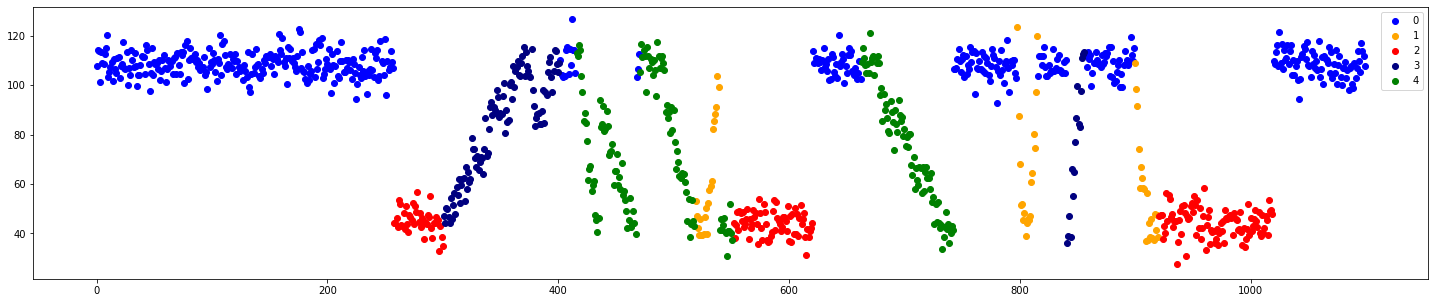

840


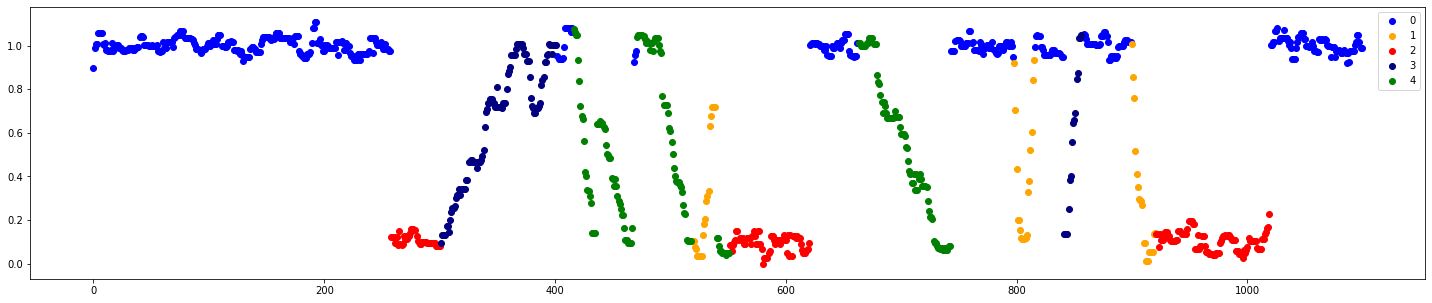

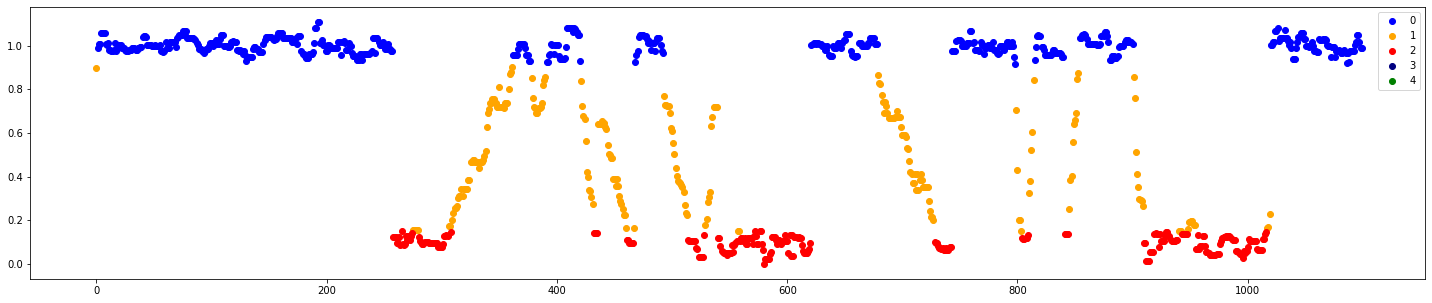

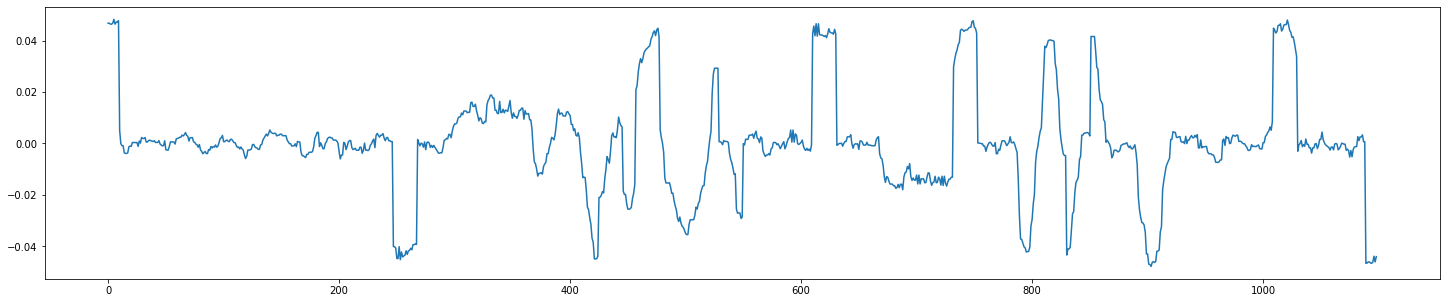

Mean accuracy =  0.7132952272727273
[[4.19090909e-01 2.06500000e+03]
 [4.50909091e-01 3.19000000e+02]
 [4.58181818e-01 3.67700000e+03]
 [4.62727273e-01 3.35100000e+03]
 [4.71818182e-01 3.91000000e+03]
 [4.73636364e-01 4.23000000e+02]
 [4.76363636e-01 3.78000000e+03]
 [4.80000000e-01 6.57000000e+02]
 [4.84545455e-01 1.90000000e+03]
 [4.86363636e-01 3.20600000e+03]
 [4.86363636e-01 3.10100000e+03]
 [4.86363636e-01 3.48500000e+03]
 [4.89090909e-01 3.76000000e+02]
 [4.89090909e-01 1.36600000e+03]
 [4.94545455e-01 4.49000000e+02]
 [4.96363636e-01 4.32000000e+02]
 [4.98181818e-01 2.81700000e+03]
 [5.00909091e-01 1.85300000e+03]
 [5.00909091e-01 3.59800000e+03]
 [5.02727273e-01 1.27400000e+03]
 [5.02727273e-01 3.13700000e+03]
 [5.07272727e-01 1.29400000e+03]
 [5.07272727e-01 3.40000000e+03]
 [5.08181818e-01 3.34700000e+03]
 [5.08181818e-01 1.34800000e+03]
 [5.09090909e-01 3.16600000e+03]
 [5.09090909e-01 1.75000000e+03]
 [5.10000000e-01 5.53000000e+02]
 [5.10000000e-01 3.90300000e+03]
 [5.118

In [207]:
def moving_average(a, n=21) :
    ret = np.cumsum(a, dtype=float)
    filt = np.ones((n,1))
    return np.convolve(a, np.ones((n,))/n, mode='full')[10:-10]

def MinMax(X,max_val,min_val):
    
    X_std = (X - np.min(X)) / (np.max(X) - np.min(X))
    X_scaled = X_std * (max_val - min_val) + min_val

    return X_scaled

def preprocessing(df):
    
    df1 = df.copy()
    scaler = MinMaxScaler()
    
    for i in range(df.shape[0]):
        df1[i,:] =  medfilt(df[i,:],7) #lowpassfilter(df[i,:], thresh = 0.075, wavelet="sym10") #
        
        max_val = np.max( df1[i,:])
        min_val = np.min( df1[i,:])
        
        df1[i,:] = scaler.fit_transform(np.reshape(df1[i,:],(1100,1)))[:,0]
        
    return df1

def make_predict(data,target,n_plots = 50):
    
    well_id = 20
    
    
    
    make_plot(data,target,well_id)
    
    data = preprocessing(data)
    
    predictions = np.zeros((data.shape[0],data.shape[1]))
    accuracy_vector = np.zeros((data.shape[0],2))
    
    predictions[:,:] = 1
    
   
    for i in range(data.shape[0]):
        
        temp =   data[i,data[i,:] > 0.8]
        
        data[i,:] = data[i,:] / np.median(temp)
        
        predictions[i,np.where(data[i,:] > 0.9)] = 0
        predictions[i,np.where(data[i,:] < 0.15)] = 2
        
        #mark label 3
        diff_sig = np.diff(data[i,:])
        mean_sig = moving_average(data[i,:])
        
        k = 0
        blue = False

        while(k != 1049):
            
            if (diff_sig[k] <= -0.5) and (mean_sig[k+20] >= 0.2): #and (diff_sig[k:k+50] < 0.2):
                blue = True
                
                if i == well_id:
                     print(k)

                
            if data[i,k] >= 0.9:
                blue = False

            if blue:
                predictions[i,k] = 3
                
                    
            
            k +=1
        
        
        accuracy_vector[i,0] = accuracy_score(target[i,:],predictions[i,:])
        accuracy_vector[i,1] = i
        
        
        
    
    

    make_plot(data,target,well_id)
    make_plot(data,predictions,well_id)
    

    plt.figure(figsize=(25,5))
    #plt.plot(np.diff(data[well_id,:]))
    plt.plot(np.diff(moving_average(data[well_id])))
    plt.show()
    
    
    

    
                       
        
        
        
    
        
    accuracy_vector = accuracy_vector[accuracy_vector[:,0].argsort()]
    
    
    print('Mean accuracy = ', np.mean(accuracy_vector[:,0]))
    
    
    print(accuracy_vector[:50,:])
    return predictions



pred = make_predict(train,target_train)





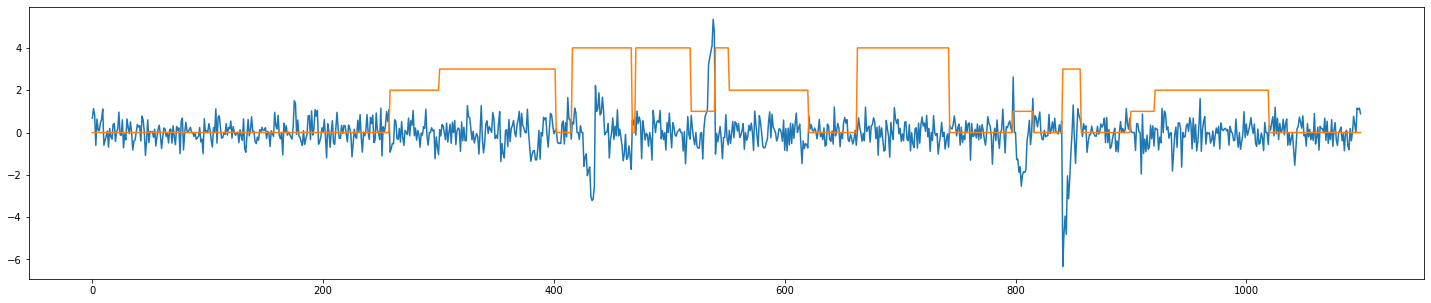

In [199]:
well_id = 20

plt.figure(figsize=(25,5))
plt.plot((train[well_id,:] - medfilt(train[well_id,:],21))/10)
plt.plot(target_train[well_id,:])

In [78]:
100a

array([[1, 4],
       [3, 1],
       [2, 1]])

In [75]:
a.sort(axis=1)

>>> a.sort(axis=0)
>>> a
array([[1, 3],
       [1, 4]])

NameError: name 'array' is not defined

In [74]:
moving_average(noise).shape

(1100,)

/home/dmitrii/Desktop/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


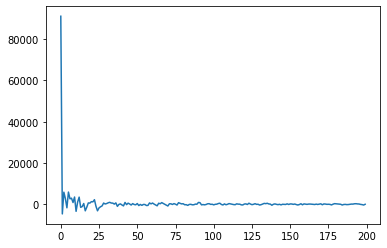

In [20]:
plt.plot(np.fft.fft(train[0,:])[:200])

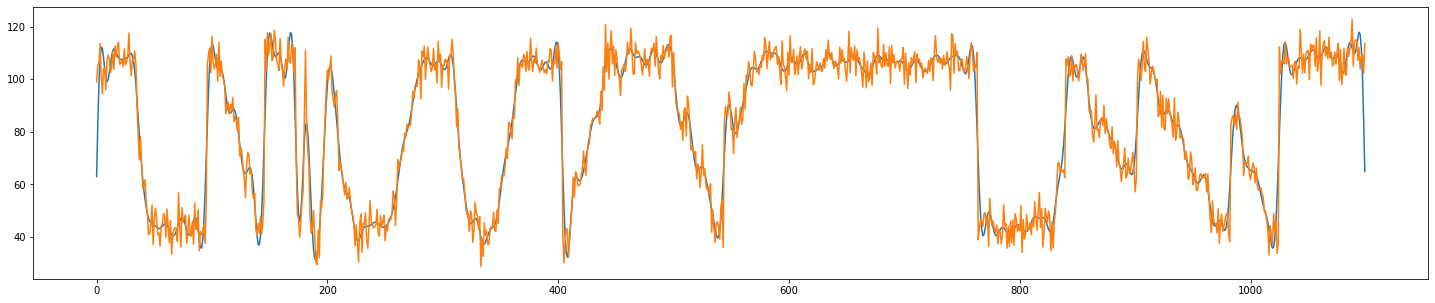

In [33]:


plt.figure(figsize=(25,5))
plt.plot()
plt.plot(train[0,:])
plt.show()

In [37]:
signal.shape

(1100,)